# Credit Score Predicting Using Classification Models

##  Importing Required Libraries
We begin by importing all the necessary Python libraries needed for analysis and model building.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [4]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
from sklearn.tree import DecisionTreeClassifier

## Data Loading
We load our dataset using pandas to begin our analysis

In [12]:
df = pd.read_csv('C:\\Users\\Lenovo\\Desktop\\Data Science\\9. MACHINE LEARNING\\ML - data set\\credit_card1.csv',low_memory=False)

In [13]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [15]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

## Data Preprocessing
We remove irrelevant features and handles missing values from the dataset.

In [17]:
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].fillna(df['Monthly_Inhand_Salary'].mean())

In [18]:
df = df.drop(['ID','Customer_ID','Month','Name','SSN','Credit_History_Age','Type_of_Loan','Credit_Mix'],axis = 1)

In [19]:
df.dropna(subset = ['Num_of_Delayed_Payment'],inplace = True)

In [20]:
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].fillna(0)

In [21]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].fillna(0)

In [22]:
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')

In [23]:
df['Monthly_Balance'] = df['Monthly_Balance'].fillna(df['Monthly_Balance'].mean())

In [24]:
df['Occupation'].fillna(df['Occupation'].mode()[0],inplace=True)
df['Payment_Behaviour'].fillna(df['Payment_Behaviour'].mode()[0],inplace = True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24928\2000283717.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Occupation'].fillna(df['Occupation'].mode()[0],inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24928\2000283717.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92998 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       92998 non-null  object 
 1   Occupation                92998 non-null  object 
 2   Annual_Income             92998 non-null  object 
 3   Monthly_Inhand_Salary     92998 non-null  float64
 4   Num_Bank_Accounts         92998 non-null  int64  
 5   Num_Credit_Card           92998 non-null  int64  
 6   Interest_Rate             92998 non-null  int64  
 7   Num_of_Loan               92998 non-null  object 
 8   Delay_from_due_date       92998 non-null  int64  
 9   Num_of_Delayed_Payment    92998 non-null  object 
 10  Changed_Credit_Limit      92998 non-null  object 
 11  Num_Credit_Inquiries      92998 non-null  float64
 12  Outstanding_Debt          92998 non-null  object 
 13  Credit_Utilization_Ratio  92998 non-null  float64
 14  Payment_of_

In [26]:
df.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7,11.27,4.0,809.98,26.822620,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.494089,Good
2,-500,Scientist,19114.12,4194.170850,3,4,3,4,3,7,_,4.0,809.98,28.609352,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.209863,Good
3,23,Scientist,19114.12,4194.170850,3,4,3,4,5,4,6.27,4.0,809.98,31.377862,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.451310,Good
5,23,Scientist,19114.12,4194.170850,3,4,3,4,8,4,9.27,4.0,809.98,27.262259,No,49.574949,62.430172331195294,!@9#%8,340.479212,Good
6,23,Scientist,19114.12,1824.843333,3,4,3,4,3,8_,11.27,4.0,809.98,22.537593,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.565317,Good


## Exploratory Data Analysis - EDA
Examines the datset's summary statistics to understand its structure.

### Data Visualization

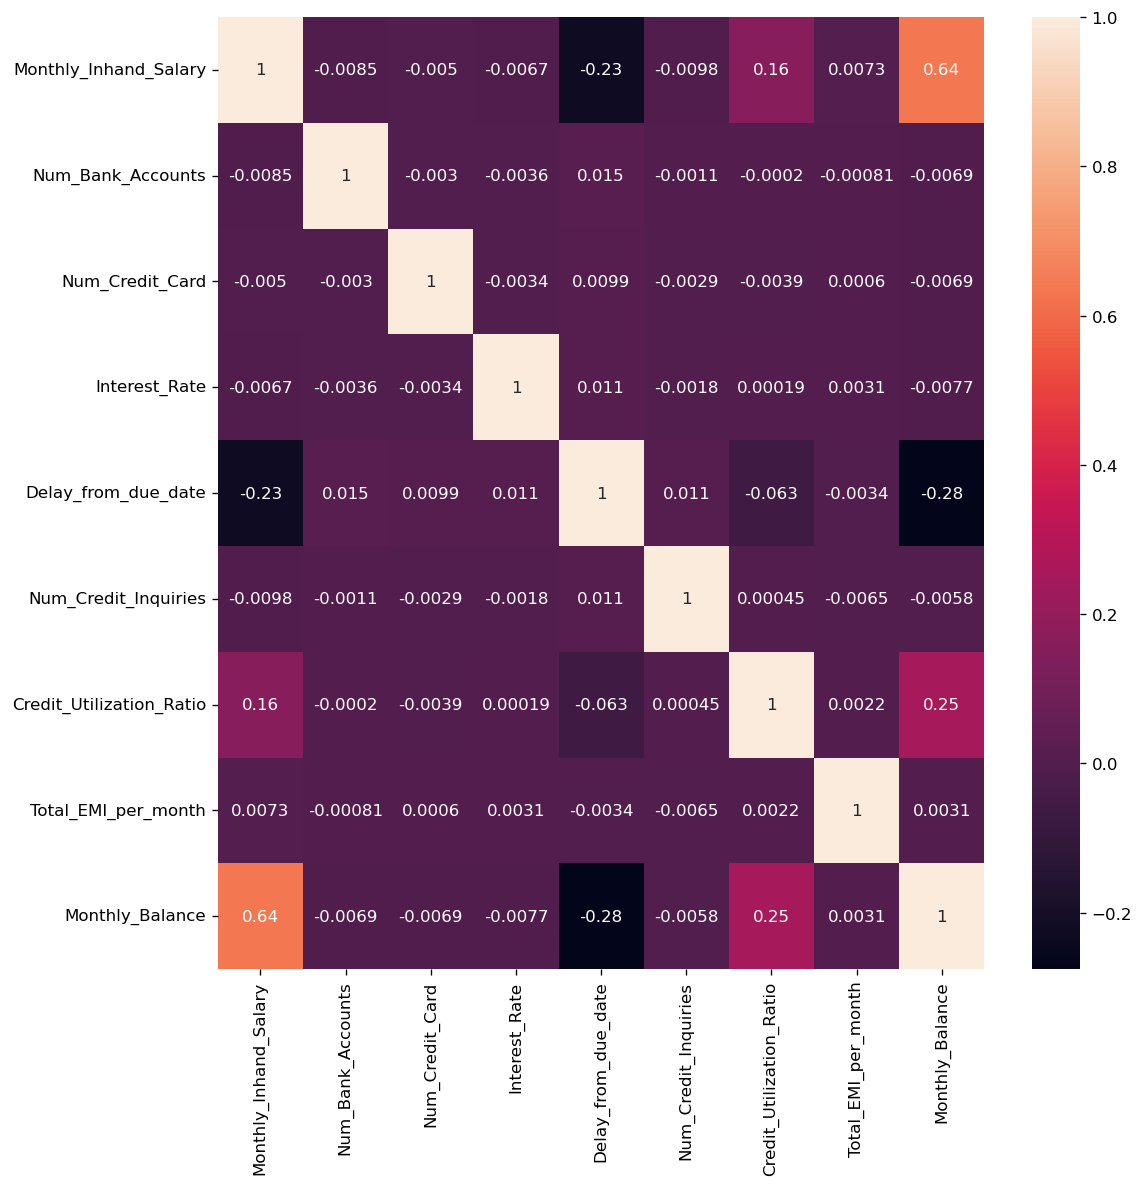

In [29]:
plt.figure(figsize = (10,10),dpi = 120)
sns.heatmap(data = df.corr(numeric_only=True),annot = True)
plt.tight_layout()
plt.show()

## Encoding Categorical Features
Categorical variables are encoded to numerical values using various encoding methods.

In [31]:
le = LabelEncoder()

In [32]:
df['Payment_of_Min_Amount'] =  le.fit_transform(df['Payment_of_Min_Amount'])

In [33]:
onehot = OneHotEncoder(drop='first',sparse_output=False)

In [34]:
occupation = df[['Occupation']]

In [35]:
occupation_encoded = onehot.fit_transform(occupation)

In [36]:
occupation_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
occupation_encoded_df = pd.DataFrame(occupation_encoded,columns = onehot.get_feature_names_out(['Occupation']),index = df.index)

In [38]:
occupation_encoded_df.head()

,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Occupation________
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [39]:
df_encoded = pd.concat([df.drop('Occupation',axis = 1),occupation_encoded_df],axis = 1)

In [40]:
df_encoded.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Occupation________
0,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-500,19114.12,4194.170850,3,4,3,4,3,7,_,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,23,19114.12,4194.170850,3,4,3,4,5,4,6.27,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,23,19114.12,4194.170850,3,4,3,4,8,4,9.27,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,23,19114.12,1824.843333,3,4,3,4,3,8_,11.27,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [41]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92998 entries, 0 to 99999
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       92998 non-null  object 
 1   Annual_Income             92998 non-null  object 
 2   Monthly_Inhand_Salary     92998 non-null  float64
 3   Num_Bank_Accounts         92998 non-null  int64  
 4   Num_Credit_Card           92998 non-null  int64  
 5   Interest_Rate             92998 non-null  int64  
 6   Num_of_Loan               92998 non-null  object 
 7   Delay_from_due_date       92998 non-null  int64  
 8   Num_of_Delayed_Payment    92998 non-null  object 
 9   Changed_Credit_Limit      92998 non-null  object 
 10  Num_Credit_Inquiries      92998 non-null  float64
 11  Outstanding_Debt          92998 non-null  object 
 12  Credit_Utilization_Ratio  92998 non-null  float64
 13  Payment_of_Min_Amount     92998 non-null  int32  
 14  Total_EMI_p

In [42]:
df_encoded['Credit_Score'] = le.fit_transform(df_encoded['Credit_Score'])

In [43]:
payment= df_encoded[['Payment_Behaviour']]

In [44]:
payment_encode = onehot.fit_transform(payment)

In [45]:
payment_encode

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [46]:
payment_encoded_df = pd.DataFrame(payment_encode,columns = onehot.get_feature_names_out(['Payment_Behaviour']),index = df_encoded.index)

In [47]:
df_encoded = pd.concat([df_encoded.drop('Payment_Behaviour',axis = 1),payment_encoded_df],axis = 1)

In [48]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92998 entries, 0 to 99999
Data columns (total 39 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Age                                                 92998 non-null  object 
 1   Annual_Income                                       92998 non-null  object 
 2   Monthly_Inhand_Salary                               92998 non-null  float64
 3   Num_Bank_Accounts                                   92998 non-null  int64  
 4   Num_Credit_Card                                     92998 non-null  int64  
 5   Interest_Rate                                       92998 non-null  int64  
 6   Num_of_Loan                                         92998 non-null  object 
 7   Delay_from_due_date                                 92998 non-null  int64  
 8   Num_of_Delayed_Payment                              92998 non-null  object 
 9   

In [49]:
df_encoded.to_csv('cleaned_credit_card.csv')

In [50]:
df1 = pd.read_csv('C:\\Users\\Lenovo\\Desktop\\Data Science\\9. MACHINE LEARNING\\ML - data set\\finalcleaned_creditcard.csv')

## Splitting Dataset
Split the dataset to training and testing dataset for model performance.

In [52]:
X = df1.drop('Credit_Score',axis = 1)
X.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed Credit Limit,...,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,23,19114.12,1824.84,3,4,3,4,3,7,11.27,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-500,19114.12,4194.73,3,4,3,4,3,7,1.99,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,23,19114.12,4194.73,3,4,3,4,5,4,6.27,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,23,19114.12,4194.73,3,4,3,4,8,4,9.27,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,23,19114.12,1824.84,3,4,3,4,3,8,11.27,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [53]:
y = df1['Credit_Score']

In [54]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=34)

* Using standard scalar for scaling the training and testing dataset to make sure the data are in balanced scale.

In [56]:
scaler = StandardScaler()

In [57]:
scaled_Xtrain = scaler.fit_transform(Xtrain)
scaled_Xtest = scaler.transform(Xtest)

## Model Predictions
Using helper function for model training,prediction and visalization on training and testing data.

In [59]:
def train_model(model,Xtrain,Xtest,ytrain,ytest):
    model.fit(Xtrain,ytrain)
    predict = model.predict(Xtest)

    print(classification_report(ytest,predict))
    print(ConfusionMatrixDisplay.from_estimator(model,Xtest,ytest))

    plt.figure(figsize =(6,6),dpi= 120)
    plt.scatter(ytest,predict)
    plt.title('Actual V/S Predicted')
    plt.xlabel('Actual Value')
    plt.ylabel('Predicted Value')
    plt.tight_layout()
    plt.show()

## Model Training - Logistic Regression

In [61]:
log_model = LogisticRegression()

              precision    recall  f1-score   support

           0       0.48      0.24      0.32      2905
           1       0.64      0.41      0.50      4768
           2       0.59      0.81      0.68      8718

    accuracy                           0.59     16391
   macro avg       0.57      0.48      0.50     16391
weighted avg       0.59      0.59      0.56     16391



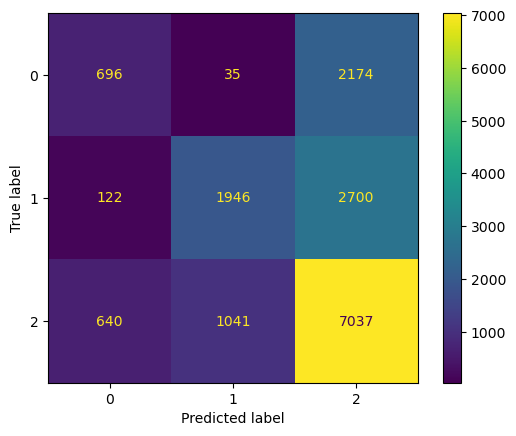

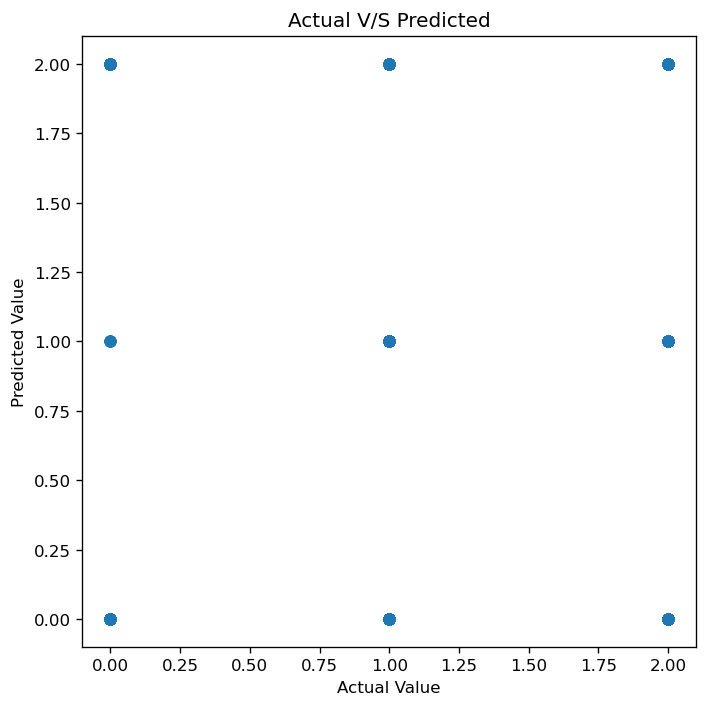

In [62]:
train_model(log_model,scaled_Xtrain,scaled_Xtest,ytrain,ytest)

## Model Training - K-Nearest Neighbours 

In [64]:
kn_model = KNeighborsClassifier(n_neighbors=30)

              precision    recall  f1-score   support

           0       0.44      0.29      0.35      2905
           1       0.66      0.44      0.53      4768
           2       0.60      0.78      0.68      8718

    accuracy                           0.59     16391
   macro avg       0.56      0.50      0.52     16391
weighted avg       0.59      0.59      0.58     16391



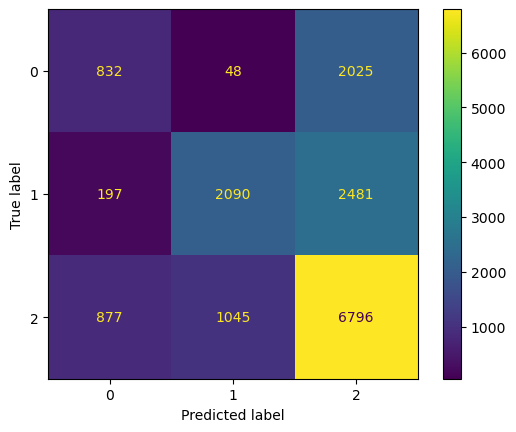

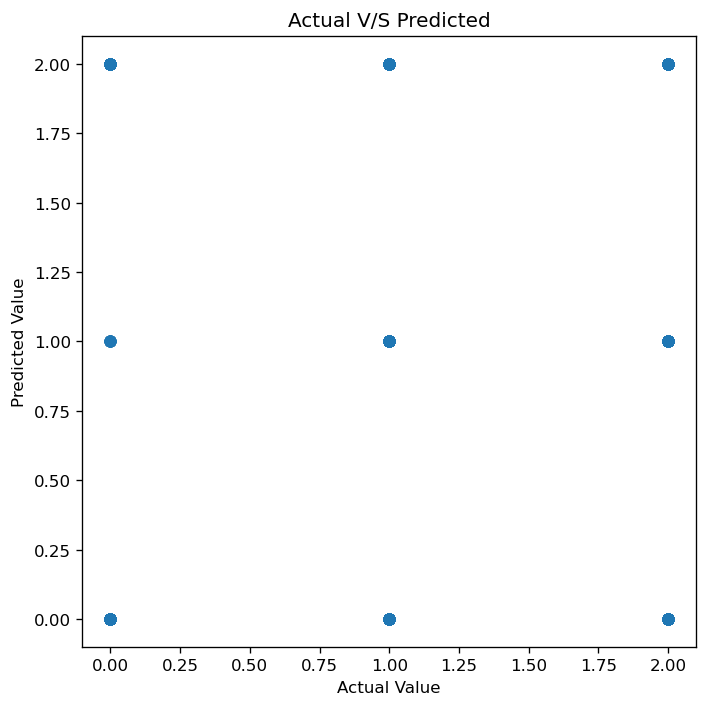

In [65]:
train_model(kn_model,scaled_Xtrain,scaled_Xtest,ytrain,ytest)

## Model Training - Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.60      0.61      0.61      2905
           1       0.69      0.69      0.69      4768
           2       0.72      0.72      0.72      8718

    accuracy                           0.69     16391
   macro avg       0.67      0.67      0.67     16391
weighted avg       0.69      0.69      0.69     16391



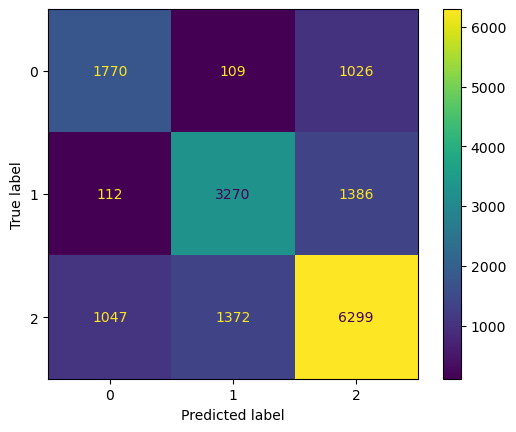

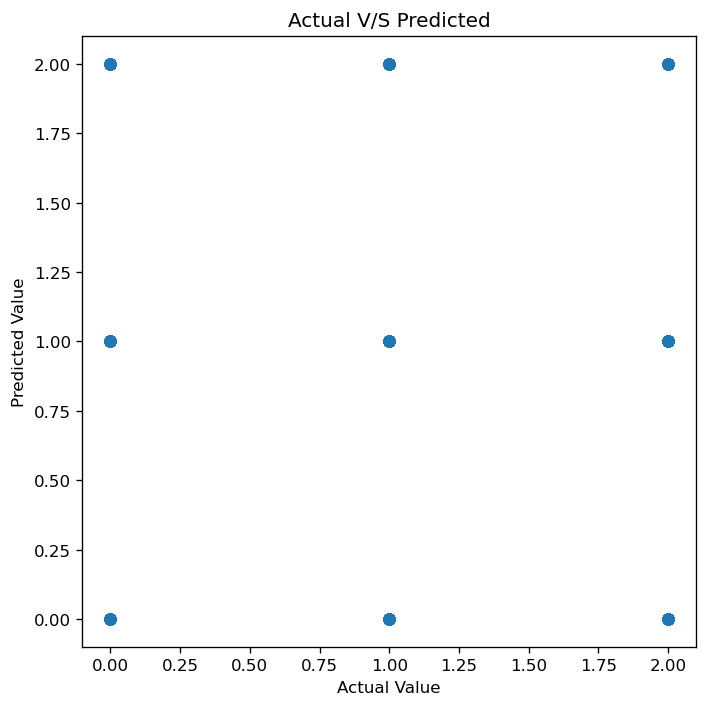

In [67]:
tree_model = DecisionTreeClassifier()
train_model(tree_model,Xtrain,Xtest,ytrain,ytest)

## Model Prediction
We test all the models by taking sample dataset randomly from testing dataset.

In [69]:
sample_Xtest = Xtest.sample(n=15)

In [70]:
sample_Xtest_copy=sample_Xtest.copy()

In [71]:
def sample_test(predict):
    sample_Xtest['Actual'] = ytest.iloc[:]
    sample_Xtest['Predicted'] = predict
    return (sample_Xtest)

## We use the trained models for making predictions on testing data

### Model Predictions - Logistic Regression

In [74]:
sample_predict = log_model.predict(sample_Xtest_copy)
sample_test(sample_predict)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed Credit Limit,...,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Actual,Predicted
18668,32,94545.750,7617.81,0,6,8,0,16,11,10.74,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,0
2305,54,92794.040,7562.84,4,7,7,0,27,16,11.09,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,0
46587,29,7056.405,486.03,4,3,30,4,24,16,16.06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1
51575,19,17565.580,1588.80,10,8,32,8,16,16,21.67,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1
12196,14,35626.750,2954.90,4,7,13,3,11,9,8.09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,0
26987,20,40216.620,3176.32,0,5,10,2,8,7,8.02,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,0
40676,30,75354.480,6563.54,8,10,31,9,61,23,9.01,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0
24711,45,109061.960,9156.50,8,4,13,4,20,9,18.09,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2,0
77945,37,62629.980,5028.17,8,7,32,8,24,17,24.17,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,1
15380,31,99912.570,4194.73,1,5,5,1,19,6,5.13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,0


### Model Prediction  - KNN Model

In [76]:
sample_predict = kn_model.predict(sample_Xtest_copy)
sample_test(sample_predict)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed Credit Limit,...,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Actual,Predicted
18668,32,94545.750,7617.81,0,6,8,0,16,11,10.74,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,2
2305,54,92794.040,7562.84,4,7,7,0,27,16,11.09,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,2
46587,29,7056.405,486.03,4,3,30,4,24,16,16.06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,2
51575,19,17565.580,1588.80,10,8,32,8,16,16,21.67,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,2
12196,14,35626.750,2954.90,4,7,13,3,11,9,8.09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,2
26987,20,40216.620,3176.32,0,5,10,2,8,7,8.02,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2
40676,30,75354.480,6563.54,8,10,31,9,61,23,9.01,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,2
24711,45,109061.960,9156.50,8,4,13,4,20,9,18.09,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2,2
77945,37,62629.980,5028.17,8,7,32,8,24,17,24.17,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,2
15380,31,99912.570,4194.73,1,5,5,1,19,6,5.13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,2


### Model Prediction - Decision Tree

In [78]:
sample_predict = tree_model.predict(sample_Xtest_copy)
sample_test(sample_predict)

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed Credit Limit,...,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Actual,Predicted
18668,32,94545.750,7617.81,0,6,8,0,16,11,10.74,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,2
2305,54,92794.040,7562.84,4,7,7,0,27,16,11.09,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,2
46587,29,7056.405,486.03,4,3,30,4,24,16,16.06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1
51575,19,17565.580,1588.80,10,8,32,8,16,16,21.67,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1
12196,14,35626.750,2954.90,4,7,13,3,11,9,8.09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,2
26987,20,40216.620,3176.32,0,5,10,2,8,7,8.02,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2
40676,30,75354.480,6563.54,8,10,31,9,61,23,9.01,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1
24711,45,109061.960,9156.50,8,4,13,4,20,9,18.09,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2,2
77945,37,62629.980,5028.17,8,7,32,8,24,17,24.17,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,2
15380,31,99912.570,4194.73,1,5,5,1,19,6,5.13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,2


## Model Training - Artificial Neural Network
Train and Predict the dataset using ANN model

### Data Preprocessing

In [81]:
feature_names = X.columns.tolist()

In [82]:
X1 = X.values
X1

array([[ 2.300000e+01,  1.911412e+04,  1.824840e+03, ...,  0.000000e+00,
         0.000000e+00,  0.000000e+00],
       [-5.000000e+02,  1.911412e+04,  4.194730e+03, ...,  0.000000e+00,
         1.000000e+00,  0.000000e+00],
       [ 2.300000e+01,  1.911412e+04,  4.194730e+03, ...,  0.000000e+00,
         0.000000e+00,  1.000000e+00],
       ...,
       [ 2.500000e+01,  3.962899e+04,  3.359420e+03, ...,  0.000000e+00,
         0.000000e+00,  0.000000e+00],
       [ 2.500000e+01,  3.962899e+04,  3.359420e+03, ...,  0.000000e+00,
         0.000000e+00,  0.000000e+00],
       [ 2.500000e+01,  3.962899e+04,  3.359420e+03, ...,  0.000000e+00,
         0.000000e+00,  1.000000e+00]])

In [83]:
y1 = y.values
y1

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

### Train - Test Data Split

In [85]:
X1train,X1test,y1train,y1test = train_test_split(X1,y1,test_size=0.2, random_state=23)

In [86]:
scaled_X1train = scaler.fit_transform(X1train)
scaled_X1test = scaler.transform(X1test)

In [87]:
scaled_X1train = np.asarray(scaled_X1train)

### Build the neural network to train the model

In [89]:
regressor = tf.keras.models.Sequential()

In [90]:
regressor.add(tf.keras.layers.Dense(units=37,activation='relu' ))

In [91]:
regressor.add(tf.keras.layers.Dense(units = 40,activation='relu'))

In [92]:
regressor.add(tf.keras.layers.Dense(units = 39,activation = 'relu'))

In [93]:
regressor.add(tf.keras.layers.Dense(units=42,activation='relu'))

In [94]:
regressor.add(tf.keras.layers.Dense(units=45,activation='relu'))

In [95]:
regressor.add(tf.keras.layers.Dense(units = 3,activation='softmax'))

In [96]:
regressor.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [97]:
regressor.fit(scaled_X1train,y1train,batch_size = 1000,epochs = 100)

Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.4877 - loss: 1.0088
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5796 - loss: 0.8486
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5987 - loss: 0.8195
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6116 - loss: 0.7993
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6225 - loss: 0.7869
Epoch 6/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6268 - loss: 0.7832
Epoch 7/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6271 - loss: 0.7770
Epoch 8/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6319 - loss: 0.7715
Epoch 9/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6361 - loss: 0.7644
Epoch 10/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6416 - loss: 0.7603
Epoch 11/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6370 - loss: 0.7591
Epoch 12/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accura

In [98]:
predict = regressor.predict(scaled_X1test)

513/513 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


### Predict the dataset by taking sample dataset from testing data

In [100]:
Xtest_df = pd.DataFrame(X1test, columns=feature_names)

In [101]:
predict_class = np.argmax(predict,axis =1)

In [102]:
Xtest_df['Actual'] = y1test
Xtest_df['Predicted'] = predict_class

In [103]:
sampled_results = Xtest_df.sample(n=15, random_state=42).reset_index(drop=True)
sampled_results

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed Credit Limit,...,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Actual,Predicted
0,22.0,28191.89,2540.32,8.0,6.0,18.0,-100.0,25.0,15.0,8.62,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2
1,38.0,58873.64,4194.73,4.0,5.0,5.0,7.0,28.0,16.0,19.73,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,1
2,34.0,13264791.00,6388.33,7.0,6.0,378.0,2.0,30.0,15.0,-4.58,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,2
3,50.0,35139.27,4194.73,1.0,5.0,8.0,3.0,8.0,2.0,1.19,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,2
4,38.0,34773.31,2878.78,1.0,5.0,6.0,2.0,0.0,0.0,4.17,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,0
5,31.0,83311.60,7081.63,10.0,7.0,27.0,8.0,43.0,19.0,21.63,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,2
6,25.0,42812.02,3604.84,5.0,5.0,10.0,5.0,8.0,18.0,11.69,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,2
7,17.0,15157.25,4194.73,8.0,10.0,24.0,5.0,52.0,24.0,6.01,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1
8,19.0,29223.35,2611.28,5.0,3.0,18.0,3.0,31.0,18.0,8.83,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,2
9,37.0,31230.98,2809.58,6.0,4.0,13.0,3.0,11.0,10.0,9.71,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,2


## Conclusion :-

In this classification task, we built and evaluated multiple machine learning models to predict the target variable, including:

- **Logistic Regression**
- **Decision Tree Classifier**
- **Random Forest Classifier**
- **Artificial Neural Network (ANN)**

After training and evaluating each model using metrics such as **Classification Report**,  and **Confusion Matrix Display**, we observed the following:

- **ANN outperformed all other models**, showing the highest accuracy in **confusion matrix display** , indicating its superior ability to capture complex patterns in the data.

### Best Performing Model: Artificial Neural Network (ANN)